In [ ]:
!pip install tweepy
!pip install twython

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
from textblob import TextBlob

In [ ]:
!pip install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 62 kB 557 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
#add your API keys and tokens here

api_key = 'XXXX'
api_secret = 'XXXX'
access_token= 'XXXX'
access_token_secret = 'XXXX'
bearer_token = 'XXXX'

In [ ]:
# to aunthenticate and get tweets from twitter
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api2 = tweepy.API(auth,wait_on_rate_limit=True)

tweets2 = api2.search_tweets(q="apple", lang="en",count=2000)

print(tweets2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet.text) for tweet in tweets2]

sentiment_objects[0].polarity, sentiment_objects[0]



(0.24318181818181817,
 TextBlob("RT @HonkaiImpact3rd: New Theme Song: TruE Released
 
 Produced by HOYO-MiX, the in-house music team, and performed by the acclaimed singer 黄龄…"))

In [ ]:
#Calculating TS polarity
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.24318181818181817,
 'RT @HonkaiImpact3rd: New Theme Song: TruE Released\n\nProduced by HOYO-MiX, the in-house music team, and performed by the acclaimed singer 黄龄…']

In [ ]:
#adding TS polarity to each tweet into the data frame
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.243182,RT @HonkaiImpact3rd: New Theme Song: TruE Rele...
1,0.100000,RT @appltrack: The Apple Card is 3 years old t...
2,0.254167,RT @Hindus4HR: We commend @Apple and @IBM for ...
3,0.500000,RT @AlbumTalksHQ: 🚨After over 5 Weeks of relea...
4,0.214286,RT @snohaalegra: 3 years ago today I shared th...


In [ ]:
#Cleaning up tweets to remove non-alphanumeric content
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.text]for tweet_info in tweets2],columns=['Date','Tweets'])
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=2000
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date']=row["Date"]
    cdata.at[index,'Tweets']=my_new_string
    index=index+1





In [ ]:
cdata.head()

,Date,Tweets
0,2022-08-17,RT HonkaiImpact3rd New Theme Song TruE Release...
1,2022-08-17,RT appltrack The Apple Card is 3 years old tod...
2,2022-08-17,RT Hindus4HR We commend Apple and IBM for beco...
3,2022-08-17,RT AlbumTalksHQ After over 5 Weeks of release ...
4,2022-08-17,RT snohaalegra 3 years ago today I shared this...


In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
#To group by tweets by dates
ccdata=pd.DataFrame(columns=['Date','Tweets'])
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

In [ ]:
#Adding sentiments to tweets
cdata["Comp"] = ''
cdata["Negative"] = ''
cdata["Neutral"] = ''
cdata["Positive"] = ''
cdata

,Date,Tweets,Comp,Negative,Neutral,Positive
0,2022-08-17,RT SpitfireVC Lizz Truss doesnt believe in han...,,,,
1,2022-08-17,Stand Steady Premier ClampOn Keyboard Tray Ex...,,,,
2,2022-08-17,RT BookDuke THE PARTY HOUSE An engrossing Hig...,,,,
3,2022-08-17,buoyantberries Join the Hunt as the Galloways ...,,,,
4,2022-08-17,RT ShannonVallor The saddest thing for me abou...,,,,
...,...,...,...,...,...,...
78,2022-08-17,RT IqooInd The Alpha version of iQOO9T stands ...,,,,
79,2022-08-17,New 16 Inch Wood Acoustic Viola with Case Rosi...,,,,
80,2022-08-17,DIFFLIFE Mini Vacuum Mug Cute Thermos 2019 New...,,,,
81,2022-08-17,rvind81 abhishekvasgi1 Muslim pee drinker Amaz...,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#using nltk library to compute the sentiments of the tweets
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in cdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', cdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        cdata.at[indexx, 'Comp']=sentence_sentiment['compound']
        cdata.at[indexx, 'Negative']=sentence_sentiment['neg']
        cdata.at[indexx, 'Neutral']=sentence_sentiment['neu']
        cdata.at[indexx, 'Positive']=sentence_sentiment['pos']
    except TypeError:

        print (indexx)

In [ ]:
cdata

,Date,Tweets,Comp,Negative,Neutral,Positive
0,2022-08-17,RT SpitfireVC Lizz Truss doesnt believe in han...,0.2584,0.071,0.779,0.15
1,2022-08-17,Stand Steady Premier ClampOn Keyboard Tray Ex...,0.0,0.0,1.0,0.0
2,2022-08-17,RT BookDuke THE PARTY HOUSE An engrossing Hig...,0.5319,0.0,0.823,0.177
3,2022-08-17,buoyantberries Join the Hunt as the Galloways ...,0.296,0.0,0.896,0.104
4,2022-08-17,RT ShannonVallor The saddest thing for me abou...,-0.7351,0.228,0.772,0.0
...,...,...,...,...,...,...
78,2022-08-17,RT IqooInd The Alpha version of iQOO9T stands ...,0.5574,0.0,0.841,0.159
79,2022-08-17,New 16 Inch Wood Acoustic Viola with Case Rosi...,0.0,0.0,1.0,0.0
80,2022-08-17,DIFFLIFE Mini Vacuum Mug Cute Thermos 2019 New...,0.4588,0.0,0.857,0.143
81,2022-08-17,rvind81 abhishekvasgi1 Muslim pee drinker Amaz...,0.1779,0.0,0.866,0.134


% of positive tweets=  56.62650602409639
% of negative tweets=  10.843373493975903


[]

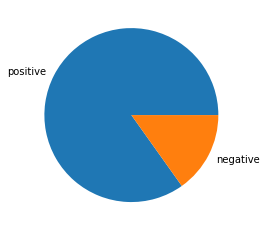

In [ ]:
#Visualizing positive and negative tweets
posi=0
nega=0
for i in range (0,len(cdata)):
    get_val=cdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(cdata)))*100
negper=(nega/(len(cdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()